In [12]:
# load dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Prep Data for ML

In [13]:
# import data

from mega import model_df
df = model_df.copy()

In [14]:
# check imported file

df

Gm# W/L D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0       1   L   D   A  MIL           31  0.258065         8       1       8   
1       2   W   N   A  MIL           32  0.281250         9       1       5   
2       3   W   N   A  MIL           34  0.264706         9       1       5   
3       4   W   D   H  SDP           33  0.212121         7       0       8   
4       5   W   N   H  SDP           33  0.242424         8       0       4   
...   ...  ..  ..  ..  ...          ...       ...       ...     ...     ...   
1808  129   L   N   A  NYY           28  0.178571         5       2       5   
1809  130   W   D   A  NYY           29  0.172414         5       1       9   
1810  131   L   D   A  NYY           35  0.342857        12       5       6   
1811  132   W   N   H  MIA           34  0.264706         9       0       8   
1812  133   L   N   H  MIA           35  0.342857        12       2       5   

       COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  OPP_HR_Column  \
0     0.351351          4           38  0.315789       12              3   
1     0.342857          3           37  0.378378       14              2   
2     0.305556          2           37  0.405405       15              3   
3     0.235294          1            0  0.000000        0              0   
4     0.305556          3            0  0.000000        0              0   
...        ...        ...          ...       ...      ...            ...   
1808  0.233333          2           31  0.129032        4              0   
1809  0.294118          4           39  0.333333       13              2   
1810  0.410256          3           29  0.206897        6              0   
1811  0.324324          3           28  0.214286        6              1   
1812  0.428571          6           34  0.382353       13              4   

     OPP_kk   Opp_obp  Opp_walks  
0        11  0.333333          1  
1        11  0.390244          2  
2         8  0.463415          4  
3         0  0.000000          0  
4         0  0.000000          0  
...     ...       ...        ...  
1808      9  0.205882          3  
1809     14  0.386364          4  
1810      8  0.323529          5  
1811     11  0.312500          4  
1812      8  0.405405          1  

[1751 rows x 19 columns]

In [15]:
# check data types

df.dtypes

Gm#                int64
W/L               object
D/N               object
H/A               object
Opp               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object

In [16]:
# confirm there are only 2 values in the win/loss column
uniquevalues = df["W/L"].unique()
print(uniquevalues)

['L' 'W']


In [17]:
# encode object columns as needed
# intialize encoders
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
le = LabelEncoder()

In [18]:
# encode columns with only 2 unique values
df["D/N"] = le.fit_transform(df["D/N"])
df["H/A"] = le.fit_transform(df["H/A"])
df["W/L"] = le.fit_transform(df["W/L"])
df

Gm#  W/L  D/N  H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  \
0       1    0    0    0  MIL           31  0.258065         8       1   
1       2    1    1    0  MIL           32  0.281250         9       1   
2       3    1    1    0  MIL           34  0.264706         9       1   
3       4    1    0    1  SDP           33  0.212121         7       0   
4       5    1    1    1  SDP           33  0.242424         8       0   
...   ...  ...  ...  ...  ...          ...       ...       ...     ...   
1808  129    0    1    0  NYY           28  0.178571         5       2   
1809  130    1    0    0  NYY           29  0.172414         5       1   
1810  131    0    0    0  NYY           35  0.342857        12       5   
1811  132    1    1    1  MIA           34  0.264706         9       0   
1812  133    0    1    1  MIA           35  0.342857        12       2   

      COL_kk   COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  \
0          8  0.351351          4           38  0.315789       12   
1          5  0.342857          3           37  0.378378       14   
2          5  0.305556          2           37  0.405405       15   
3          8  0.235294          1            0  0.000000        0   
4          4  0.305556          3            0  0.000000        0   
...      ...       ...        ...          ...       ...      ...   
1808       5  0.233333          2           31  0.129032        4   
1809       9  0.294118          4           39  0.333333       13   
1810       6  0.410256          3           29  0.206897        6   
1811       8  0.324324          3           28  0.214286        6   
1812       5  0.428571          6           34  0.382353       13   

      OPP_HR_Column OPP_kk   Opp_obp  Opp_walks  
0                 3     11  0.333333          1  
1                 2     11  0.390244          2  
2                 3      8  0.463415          4  
3                 0      0  0.000000          0  
4                 0      0  0.000000          0  
...             ...    ...       ...        ...  
1808              0      9  0.205882          3  
1809              2     14  0.386364          4  
1810              0      8  0.323529          5  
1811              1     11  0.312500          4  
1812              4      8  0.405405          1  

[1751 rows x 19 columns]

In [19]:
# encode column with multiple values
encoded_opp = ohe.fit_transform(df[['Opp']])
encoded_df = pd.DataFrame(encoded_opp, columns=ohe.get_feature_names_out(['Opp']), index=df.index)
encoded_df

Opp_ARI  Opp_ATL  Opp_BAL  Opp_BOS  Opp_CHC  Opp_CHW  Opp_CIN  Opp_CLE  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1808        0        0        0        0        0        0        0        0   
1809        0        0        0        0        0        0        0        0   
1810        0        0        0        0        0        0        0        0   
1811        0        0        0        0        0        0        0        0   
1812        0        0        0        0        0        0        0        0   

      Opp_DET  Opp_HOU  ...  Opp_PHI  Opp_PIT  Opp_SDP  Opp_SEA  Opp_SFG  \
0           0        0  ...        0        0        0        0        0   
1           0        0  ...        0        0        0        0        0   
2           0        0  ...        0        0        0        0        0   
3           0        0  ...        0        0        1        0        0   
4           0        0  ...        0        0        1        0        0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1808        0        0  ...        0        0        0        0        0   
1809        0        0  ...        0        0        0        0        0   
1810        0        0  ...        0        0        0        0        0   
1811        0        0  ...        0        0        0        0        0   
1812        0        0  ...        0        0        0        0        0   

      Opp_STL  Opp_TBR  Opp_TEX  Opp_TOR  Opp_WSN  
0           0        0        0        0        0  
1           0        0        0        0        0  
2           0        0        0        0        0  
3           0        0        0        0        0  
4           0        0        0        0        0  
...       ...      ...      ...      ...      ...  
1808        0        0        0        0        0  
1809        0        0        0        0        0  
1810        0        0        0        0        0  
1811        0        0        0        0        0  
1812        0        0        0        0        0  

[1751 rows x 29 columns]

In [20]:

# concat encoded data to original dataframe, drop original "opp" column, save as new df
model_df = pd.concat([df, encoded_df], axis=1)
model_df = model_df.drop(columns= "Opp")
model_df

Gm#  W/L  D/N  H/A  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0       1    0    0    0           31  0.258065         8       1       8   
1       2    1    1    0           32  0.281250         9       1       5   
2       3    1    1    0           34  0.264706         9       1       5   
3       4    1    0    1           33  0.212121         7       0       8   
4       5    1    1    1           33  0.242424         8       0       4   
...   ...  ...  ...  ...          ...       ...       ...     ...     ...   
1808  129    0    1    0           28  0.178571         5       2       5   
1809  130    1    0    0           29  0.172414         5       1       9   
1810  131    0    0    0           35  0.342857        12       5       6   
1811  132    1    1    1           34  0.264706         9       0       8   
1812  133    0    1    1           35  0.342857        12       2       5   

       COL_obp  ...  Opp_PHI  Opp_PIT  Opp_SDP Opp_SEA  Opp_SFG Opp_STL  \
0     0.351351  ...        0        0        0       0        0       0   
1     0.342857  ...        0        0        0       0        0       0   
2     0.305556  ...        0        0        0       0        0       0   
3     0.235294  ...        0        0        1       0        0       0   
4     0.305556  ...        0        0        1       0        0       0   
...        ...  ...      ...      ...      ...     ...      ...     ...   
1808  0.233333  ...        0        0        0       0        0       0   
1809  0.294118  ...        0        0        0       0        0       0   
1810  0.410256  ...        0        0        0       0        0       0   
1811  0.324324  ...        0        0        0       0        0       0   
1812  0.428571  ...        0        0        0       0        0       0   

      Opp_TBR  Opp_TEX  Opp_TOR  Opp_WSN  
0           0        0        0        0  
1           0        0        0        0  
2           0        0        0        0  
3           0        0        0        0  
4           0        0        0        0  
...       ...      ...      ...      ...  
1808        0        0        0        0  
1809        0        0        0        0  
1810        0        0        0        0  
1811        0        0        0        0  
1812        0        0        0        0  

[1751 rows x 47 columns]

In [21]:
# debug: Locate the positions of "error"
error_positions = model_df.isin(['error'])

# get the indices of "error" values
error_indices = [(row, col) for row, col in zip(*error_positions.to_numpy().nonzero())]

# Display the indices
print("\nIndices of 'error' values:")
print(error_indices)


Indices of 'error' values:
[(37, 15), (1118, 13)]


In [22]:
# apply new values to those data cells
model_df.iloc[37, 15] = 0
model_df.iloc[1118, 13] = 0


In [23]:
# ensure column values are numerical
model_df['OPP_kk'] = pd.to_numeric(model_df['OPP_kk'], errors='coerce')
model_df['Opp_hits'] = pd.to_numeric(model_df['Opp_hits'], errors='coerce')

In [24]:
# check dtypes for all columns again
model_df.dtypes

Gm#                int64
W/L                int32
D/N                int32
H/A                int32
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits           int64
OPP_HR_Column      int64
OPP_kk             int64
Opp_obp          float64
Opp_walks          int64
Opp_ARI            int32
Opp_ATL            int32
Opp_BAL            int32
Opp_BOS            int32
Opp_CHC            int32
Opp_CHW            int32
Opp_CIN            int32
Opp_CLE            int32
Opp_DET            int32
Opp_HOU            int32
Opp_KCR            int32
Opp_LAA            int32
Opp_LAD            int32
Opp_MIA            int32
Opp_MIL            int32
Opp_MIN            int32
Opp_NYM            int32
Opp_NYY            int32
Opp_OAK            int32
Opp_PHI            int32
Opp_PIT            int32
Opp_SDP            int32


In [25]:
# Get target variable ("win/loss" column) - y 
y = model_df["W/L"]
len(y)

1751

In [26]:
# Get the features - X
X = model_df.copy()
X =X.drop(columns = "W/L", axis =1)
X

Gm#  D/N  H/A  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0       1    0    0           31  0.258065         8       1       8   
1       2    1    0           32  0.281250         9       1       5   
2       3    1    0           34  0.264706         9       1       5   
3       4    0    1           33  0.212121         7       0       8   
4       5    1    1           33  0.242424         8       0       4   
...   ...  ...  ...          ...       ...       ...     ...     ...   
1808  129    1    0           28  0.178571         5       2       5   
1809  130    0    0           29  0.172414         5       1       9   
1810  131    0    0           35  0.342857        12       5       6   
1811  132    1    1           34  0.264706         9       0       8   
1812  133    1    1           35  0.342857        12       2       5   

       COL_obp  COL_walks  ...  Opp_PHI  Opp_PIT  Opp_SDP  Opp_SEA  Opp_SFG  \
0     0.351351          4  ...        0        0        0        0        0   
1     0.342857          3  ...        0        0        0        0        0   
2     0.305556          2  ...        0        0        0        0        0   
3     0.235294          1  ...        0        0        1        0        0   
4     0.305556          3  ...        0        0        1        0        0   
...        ...        ...  ...      ...      ...      ...      ...      ...   
1808  0.233333          2  ...        0        0        0        0        0   
1809  0.294118          4  ...        0        0        0        0        0   
1810  0.410256          3  ...        0        0        0        0        0   
1811  0.324324          3  ...        0        0        0        0        0   
1812  0.428571          6  ...        0        0        0        0        0   

      Opp_STL  Opp_TBR  Opp_TEX  Opp_TOR  Opp_WSN  
0           0        0        0        0        0  
1           0        0        0        0        0  
2           0        0        0        0        0  
3           0        0        0        0        0  
4           0        0        0        0        0  
...       ...      ...      ...      ...      ...  
1808        0        0        0        0        0  
1809        0        0        0        0        0  
1810        0        0        0        0        0  
1811        0        0        0        0        0  
1812        0        0        0        0        0  

[1751 rows x 46 columns]

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# scale the data!
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same parameters
X_test_scaled = scaler.transform(X_test)


# Decision Tree

In [29]:
# create decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [30]:
# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 1.000
Decision Tree Classifier Model - Test Accuracy: 0.749


- Model test score is less than project-allowed minimum. 
- Next: explore tuning the model to improve performance.

In [31]:
# hypertune the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [70,80, 90],
    'min_samples_leaf': [6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [32]:
# Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Evaluation:\n", report)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 80}
Best Cross-Validation Score: 0.7532174266391897
Test Set Evaluation:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       271
           1       0.68      0.65      0.66       167

    accuracy                           0.75       438
   macro avg       0.73      0.73      0.73       438
weighted avg       0.74      0.75      0.75       438



In [33]:
# create decision tree classifier model
dt_model2 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 8, min_samples_split= 80)
dt_model2.fit(X_train_scaled, y_train)

# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model2.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model2.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 0.806
Decision Tree Classifier Model - Test Accuracy: 0.747


- Tuning the model did not bring up the test accuracy score to acceptable levels. 

# Random Forest

In [34]:
# Create the random forest classifier model
# with n_estimators=128 | change as needed, or run multiple n_estimators...?
rf_model = RandomForestClassifier(n_estimators=128)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [35]:
# Validate the model by checking the model accuracy with model.score
print('Random Forest Classifier Model - Train Accuracy: %.3f' % rf_model.score(X_train_scaled, y_train))
print('Random Forest Classifier Model - Test Accuracy: %.3f' % rf_model.score(X_test_scaled, y_test))

Random Forest Classifier Model - Train Accuracy: 1.000
Random Forest Classifier Model - Test Accuracy: 0.817


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       271
           1       0.76      0.76      0.76       167

    accuracy                           0.82       438
   macro avg       0.81      0.81      0.81       438
weighted avg       0.82      0.82      0.82       438



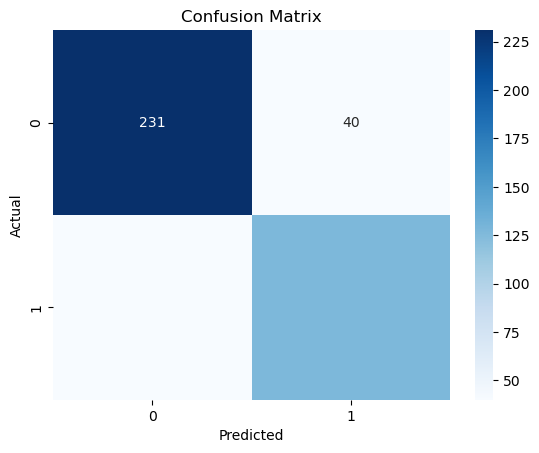

In [44]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Make Predictions with higher scoring Model

In [ ]:
# predict

In [48]:
feature_list = X.columns.tolist()

In [53]:
# visual(s)?
from sklearn.tree import plot_tree
# Visualize one of the trees from the forest
plt.figure(figsize=(240, 80))
plot_tree(rf_model.estimators_[0], feature_names=feature_list, class_names=['Lose[0]', 'Win[1]'], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()